In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['font.size'] = 20

In [17]:
data = pd.read_csv("observed-solar-cycle-indices.csv")
dt = data.rename(columns={'time-tag': 'date'})
dt['date'] = pd.to_datetime(dt['date'], format='%Y-%m')
dt = dt.set_index('date')
dt.head()

,Unnamed: 0,ssn,smoothed_ssn,observed_swpc_ssn,smoothed_swpc_ssn,f10.7,smoothed_f10.7
date,,,,,,,
1749-01-01,0,96.7,-1.0,-1.0,-1.0,-1.0,-1.0
1749-02-01,1,104.3,-1.0,-1.0,-1.0,-1.0,-1.0
1749-03-01,2,116.7,-1.0,-1.0,-1.0,-1.0,-1.0
1749-04-01,3,92.8,-1.0,-1.0,-1.0,-1.0,-1.0
1749-05-01,4,141.7,-1.0,-1.0,-1.0,-1.0,-1.0


In [57]:
dt['ssn'].describe()

count    3301.000000
mean       81.785822
std        67.659856
min         0.000000
25%        24.100000
50%        67.600000
75%       122.400000
max       398.200000
Name: ssn, dtype: float64

In [20]:
from scipy.signal import find_peaks

In [78]:
ssn = dt['ssn']
indices = find_peaks(ssn, threshold=25)[0]
peakYears = pd.Series([ssn.index[i] for i in indices])
peakSSN = pd.Series([ssn[j] for j in indices])


troffs = dt[(dt['ssn']==0)].index
ss = ssn[troffs]
print(ss)



## identify wavelengths
periods = {}


date
1754-01-01    0.0
1755-05-01    0.0
1755-06-01    0.0
1775-02-01    0.0
1798-05-01    0.0
             ... 
1902-04-01    0.0
1912-02-01    0.0
1913-05-01    0.0
1913-06-01    0.0
2009-08-01    0.0
Name: ssn, Length: 67, dtype: float64


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

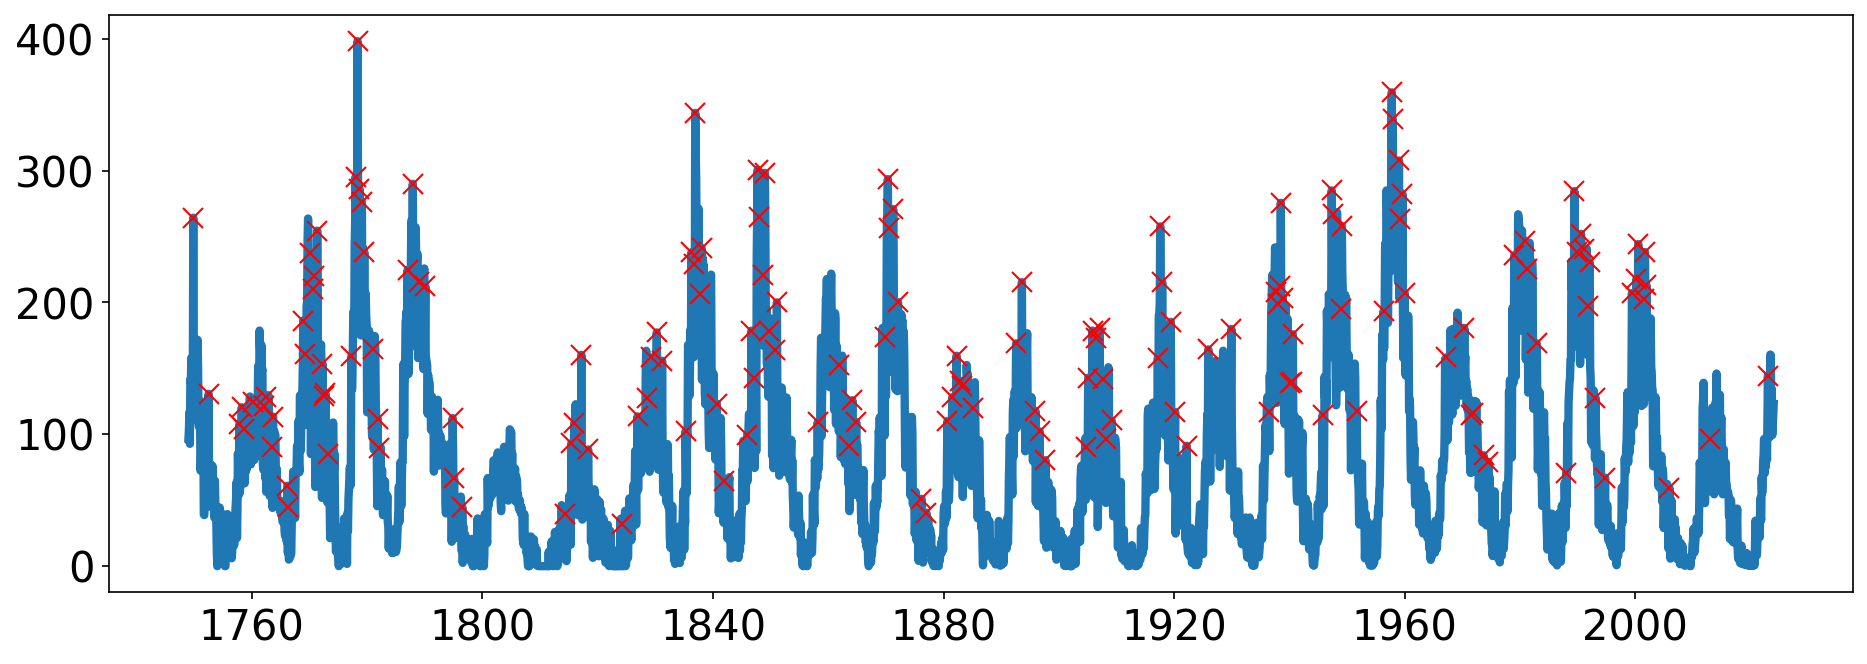

In [75]:
x_width, y_width = 15, 5
fig, ax = plt.subplots(1, 1, figsize=(x_width, y_width), dpi=150)
ax.plot(ssn)
ax.plot(
     peakYears
    ,peakSSN
    ,marker = 'x'
    ,markersize=10
    ,linewidth=0
    ,color='red'
)
ax.axvline(ss, ymin=0, ymax=400)